In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *
def search_images(term,max_images=30):
    print("Searching for",term)
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [2]:
urls=search_images('grizzly bear',max_images=1)
urls[0]

Searching for grizzly bear


C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

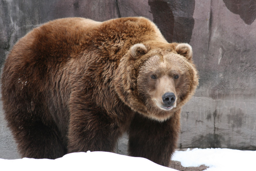

In [3]:
from fastdownload import download_url
dest='images/grizzly.jpg'
download_url(urls[0],dest,show_progress=False)

from fastai.vision.all import *
im=Image.open(dest)
im.to_thumb(256,256)

In [4]:
from fastai.imports import *
import fastai
bear_types='grizzly','black','teddy'
path=Path('bears')

for o in bear_types:
    dest=path/o
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} bear photos'))
    resize_images(path/o,max_size=400,dest=path/o)

Searching for grizzly bear photos


C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for black bear photos
Searching for teddy bear photos


In [5]:
fns=get_image_files(path)
fns

(#378) [Path('bears/black/018a3a83-3be5-4633-844c-c8d7520fcaa2.jpg'),Path('bears/black/0334d542-72da-440e-906c-dfa13c68442a.jpg'),Path('bears/black/0a158d09-dfe1-4647-9b82-28e151b25fea.jpg'),Path('bears/black/0b4bb3c3-da16-4ac2-810b-bcd536d7e25b.jpg'),Path('bears/black/10fecd61-6381-456c-956d-e23711e147f2.jpg'),Path('bears/black/11310d28-0bb1-4f8a-a175-d7612b3649e3.jpg'),Path('bears/black/12ed4814-d566-4515-858d-d8bcd9402d8a.jpg'),Path('bears/black/13f37d0d-d0fd-4c5e-ad30-4ce4b9219dd4.jpg'),Path('bears/black/1684c0ef-0624-4c53-b6e8-0ed94ab12ab1.jpg'),Path('bears/black/16e0baa3-d37c-4afe-89d8-0de090d44181.jpg')...]

In [6]:
failed=verify_images(fns)
failed

(#7) [Path('bears/black/4645d5e9-d64b-4ed3-b2db-74d2b1199378.jpg'),Path('bears/black/bc5e63d5-eb07-4c96-9225-3373d60e55af.jpg'),Path('bears/referee/21c01f6b-7b4a-4302-9d15-f23194f764a2.jpg'),Path('bears/referee/4466e0dd-30ad-4a89-931c-210ee124f754.jpg'),Path('bears/teddy/2b35066f-2ff0-4aeb-904c-d364d916da44.jpg'),Path('bears/umpire/57d9ad22-c964-442f-b523-0ead6e0e68a7.jpg'),Path('bears/umpire/8b30274b-c8ee-4e7a-a6a1-6cb5ca520375.jpg')]

In [7]:
failed.map(Path.unlink);

In [13]:
bears=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [14]:
dls=bears.dataloaders(path)

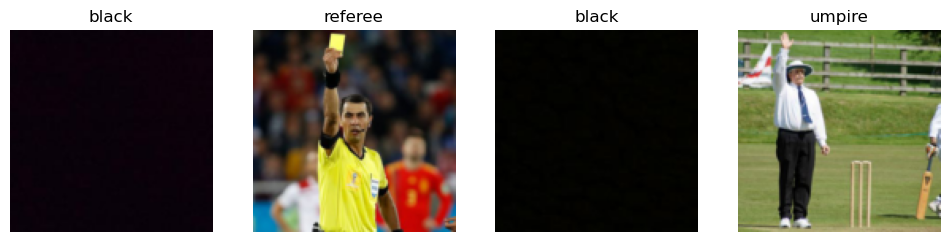

In [15]:
dls.valid.show_batch(max_n=4,nrows=1)

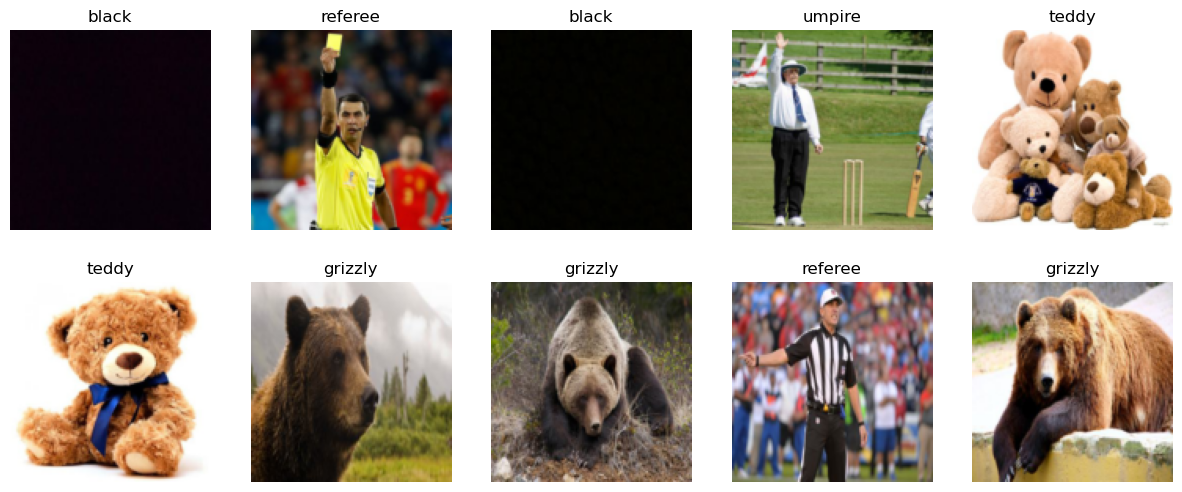

In [17]:
bears=bears.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=10,nrows=2)